# Regressão 01 - tarefa 01

In [27]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [28]:
# a)
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           5.02e-23
Time:                        03:05:07   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='tip', ylabel='net_bill'>

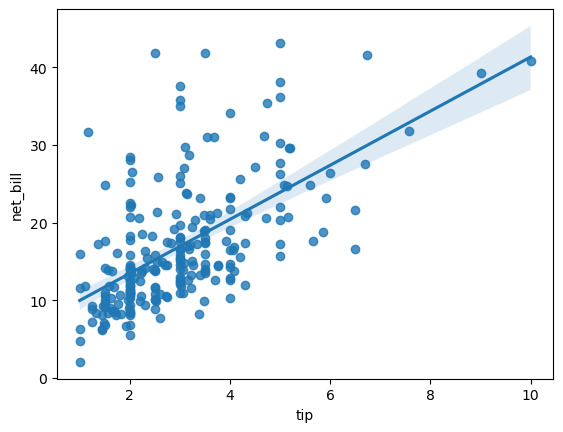

In [29]:
#b)
# Gráfico de dispersão
sns.regplot(x = 'tip', y = 'net_bill', data = tips[tips['tip_pct']<.5])


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

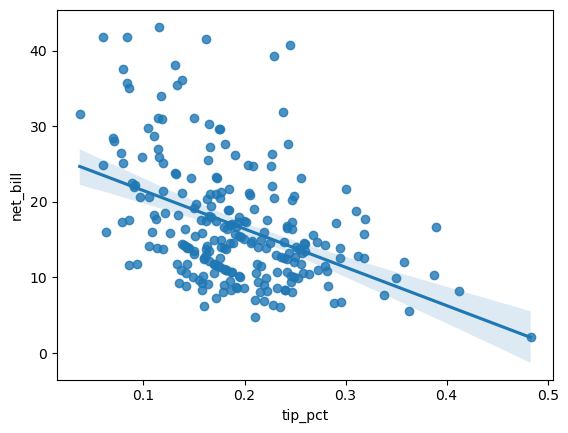

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        03:05:13   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
sns.regplot(x = 'tip_pct', y = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.show()
reg2.summary()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [31]:
# Comparando os valores de R² das regressões reg e reg2
print(f"R² da regressão reg (tip ~ net_bill): {reg.rsquared:.4f}")
print(f"R² da regressão reg2 (tip_pct ~ net_bill): {reg2.rsquared:.4f}")

if reg.rsquared > reg2.rsquared:
    print("A regressão reg (tip ~ net_bill) possui a melhor amostragem.")
else:
    print("A regressão reg2 (tip_pct ~ net_bill) possui a melhor amostragem.")

R² da regressão reg (tip ~ net_bill): 0.3325
R² da regressão reg2 (tip_pct ~ net_bill): 0.0913
A regressão reg (tip ~ net_bill) possui a melhor amostragem.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [32]:
#1)
tips['pred'] = reg2.fittedvalues
tips['pred']

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Name: pred, Length: 244, dtype: float64

In [33]:
#2)
reg4 = smf.ols('tip ~ (tip_pct * net_bill)', data = tips).fit()
reg4.predict(tips)

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Length: 244, dtype: float64

In [34]:
#3)
reg4.rsquared

1.0

In [35]:
#4)
# Comparando os valores de R² das regressões reg2 e reg4
print(f"R² da regressão reg (tip ~ net_bill): {reg2.rsquared:.4f}")
print(f"R² da regressão reg4 (tip ~ (tip_pct * net_bill): {reg4.rsquared:.4f}")

if reg2.rsquared > reg4.rsquared:
    print("A regressão reg (tip ~ net_bill) possui a melhor amostragem.")
else:
    print("A regressão reg4 (tip ~ (tip_pct * net_bill) possui a melhor amostragem.")

R² da regressão reg (tip ~ net_bill): 0.0913
R² da regressão reg4 (tip ~ (tip_pct * net_bill): 1.0000
A regressão reg4 (tip ~ (tip_pct * net_bill) possui a melhor amostragem.
